<a href="https://colab.research.google.com/github/Mahg39/Python/blob/main/AI_trading_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn yfinance ccxt MetaTrader5 backtrader tensorflow scikit-learn

  Using cached ccxt-4.4.62-py2.py3-none-any.whl.metadata (130 kB)
ERROR: Could not find a version that satisfies the requirement MetaTrader5 (from versions: none)
ERROR: No matching distribution found for MetaTrader5


In [ ]:
!pip install yfinance


[*********************100%***********************]  1 of 1 completed

Price                       Close    High     Low    Open Volume
Ticker                       GC=F    GC=F    GC=F    GC=F   GC=F
Datetime                                                        
2025-02-17 08:00:00+03:00  2907.6  2916.5  2907.5  2910.3      0
2025-02-17 09:00:00+03:00  2909.0  2910.9  2900.6  2907.4   4791
2025-02-17 10:00:00+03:00  2914.3  2915.4  2908.4  2909.0   3592
2025-02-17 11:00:00+03:00  2912.0  2914.5  2907.8  2914.2   4410
2025-02-17 12:00:00+03:00  2914.3  2919.0  2912.1  2912.3   4981


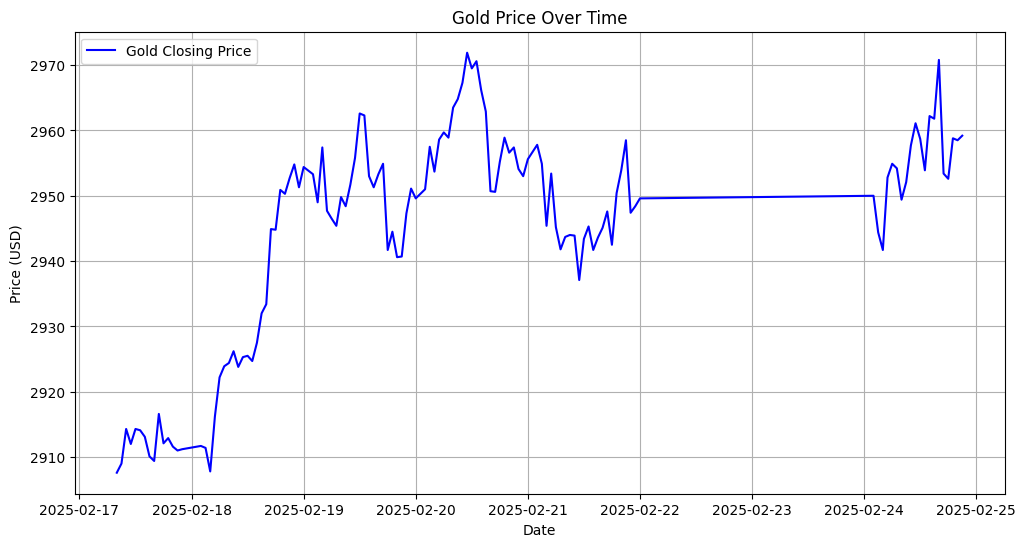

In [ ]:
# Import the necessary libraries.
# 'yfinance' helps get market data from Yahoo Finance.
# 'pandas' is used to handle data in Dataframes format, which is very
   #-convienient for analysis.

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


#getting historical gold price data
#"GC=F" is the ticker for Gold Futures
gold_data = yf.download("GC=F", interval="1h", period="7d")


#Convert to Dataframe
#df = pd.Dataframe(bars, columns=['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])

#Convert time to UTC+3
gold_data.index = gold_data.index.tz_convert('Africa/Nairobi') #Nairobi timezone (UTX+3)
#df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='ms')

# Round Prices to 2 decimal places
gold_data = gold_data.round(2)

# Print first 5 rows
print(gold_data.head())

#Plot the closing price to visualize the trend over time.
# Matplotlib is used for plotting; we set the figure size for clarity.
plt.figure(figsize=(12, 6))
plt.plot(gold_data['Close'], label='Gold Closing Price', color='blue')
plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



Saving Gold Futures Historical Data.csv to Gold Futures Historical Data (9).csv
         Date     Price      Open      High       Low     Vol. Change %
0  02/25/2025  2,915.00  2,965.99  2,968.40  2,911.26  155.51K   -1.63%
1  02/24/2025  2,963.20  2,950.40  2,974.00  2,936.80  162.78K    0.34%
2  02/21/2025  2,953.20  2,955.70  2,964.70  2,930.10  163.69K   -0.10%
3  02/20/2025  2,956.10  2,949.50  2,973.40  2,939.30  172.20K    0.68%
4  02/19/2025  2,936.10  2,954.10  2,964.40  2,933.70  159.34K   -0.44%
   timestamp     open    high      low   close
0 2025-02-25  2965.99  2968.4  2911.26  2915.0
1 2025-02-24  2950.40  2974.0  2936.80  2963.2
2 2025-02-21  2955.70  2964.7  2930.10  2953.2
3 2025-02-20  2949.50  2973.4  2939.30  2956.1
4 2025-02-19  2954.10  2964.4  2933.70  2936.1
     close  support  resistance
11  2887.6      NaN         NaN
12  2876.7      NaN         NaN
13  2893.0      NaN         NaN
14  2875.8      NaN         NaN
15  2857.1      NaN         NaN
16  2835.0    

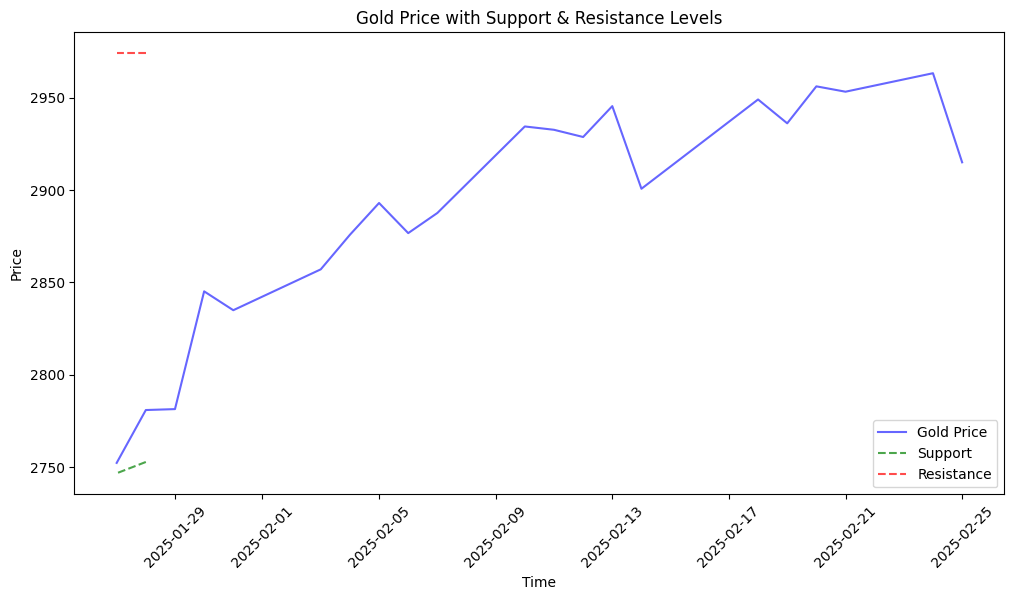

In [12]:
# Import required libraries
import pandas as pd   #Handles data in table format
import yfinance as yf #gets financial data
import datetime       #Handles date and time
import numpy as np    #For numerical operations
import matplotlib.pyplot as plt  # For visualization
#import ccxt           #Import CCXT library for broker API

# Define Gold
# Define correct parameters
#ticker = "XAUUSD=X"  # Gold Spot Price (Forex)
#interval = "15m"  # Correct interval format


from google.colab import files

# 📌 Upload file manually
uploaded = files.upload()

file_name = "Gold Futures Historical Data.csv"

# 📌 Load CSV
gold_data = pd.read_csv(file_name)

# Show first few rows to check the data
print(gold_data.head())


# Set the time range for historical data
#start_date = (datetime.datetime.now() - datetime.timedelta(days=180)).strftime('%Y-%m-%d')
#end_date = datetime.datetime.now().strftime('%Y-%m-%d') #now

#get Gold price data from Yahoo Finance
#gold_data = yf.download("GC=F", period="6mo", interval="15m")

#Reset index to move timestamp from index to column
#gold_data.reset_index(inplace=True)

# Rename columns to match expected names
gold_data.rename(columns={
    'Date': 'timestamp',   # Rename Date to timestamp
    'Price': 'close',      # Rename Price to close
    'Open': 'open',        # Keep Open as open
    'High': 'high',        # Keep High as high
    'Low': 'low'           # Keep Low as low
}, inplace=True)


gold_data = gold_data[['timestamp', 'open', 'high', 'low', 'close']]

# Remove commas and convert prices to float
gold_data[['open', 'high', 'low', 'close']] = gold_data[['open', 'high', 'low', 'close']].replace(',', '', regex=True).astype(float).round(2)

# Convert timestamp column to a proper datetime format
gold_data['timestamp'] = pd.to_datetime(gold_data['timestamp'], format='%m/%d/%Y')

print(gold_data.head())

# Detect Support and Resistance Levels//
def find_support_resistance(data, window=20):
  """
  Identifies support and resistance levels based on
  rolling highs and lows.
  - window: The number of previous candles to check for S/R levels.
  """
  data['resistance'] = data['high'].rolling(window=window).max()  #Highest price in last 'window' candles
  data['support'] = data['low'].rolling(window=window).min()      #Lowest price in last 'window' candles
  return data

#Apply the function to our gold price data
gold_data = find_support_resistance(gold_data)

#Display the latest rows with support and ressistance levels
print(gold_data[['close', 'support', 'resistance']].tail(10))

# Visualization of Support and Resistance
plt.figure(figsize=(12, 6))
plt.plot(gold_data['timestamp'], gold_data['close'], label='Gold Price', color='blue', alpha=0.6)
plt.plot(gold_data['timestamp'], gold_data['support'], label='Support', linestyle='--', color='green', alpha=0.7)
plt.plot(gold_data['timestamp'], gold_data['resistance'], label='Resistance', linestyle='--', color='red', alpha=0.7)
plt.title('Gold Price with Support and Resistance Levels')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title("Gold Price with Support & Resistance Levels")
plt.legend()
plt.xticks(rotation=45)
plt.show()




